In [1]:
# -*- coding: utf-8 -*-
# Author: Ehsan M. Kermani, ehsanmo1367@gmail.com
# Website: metalearner.org

"""
Monty Hall Game Simulation [[http://en.wikipedia.org/wiki/Monty_Hall_problem]]
"""

import numpy as np
from numpy.random import RandomState
from random import sample
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
%matplotlib inline


class MontyHall(object):
    """
    Creates simulation game object

    Parameters:
    ----------
    n_games:    int         Number of games
    n_bins:     int         Number of bins
    n_discards: int         Number of discard options
    switch:     boolean     Switch or not
    seed:       int         Seed number
    """

    def __init__(self, n_games, n_bins, n_discards, switch=False, seed=123):
        self.n_games = n_games
        self.n_bins = n_bins
        self.n_discards = n_discards
        self.switch = switch
        self.seed = seed

    def set_prize(self):
        """ Set prize randomly for each game with fixed RandomState """
        prng = RandomState(self.seed)
        return prng.randint(0, self.n_bins, self.n_games)

    def player_first_choice(self):
        """ Player first choice in each game with fixed
            RandomState to get same numbers in different calls
        """
        prng = RandomState(2 * self.seed)
        return prng.randint(0, self.n_bins, self.n_games)

    def player_final_choice(self):
        """ Player final choice after discarding some options by host"""
        if not self.switch:
            return self.player_first_choice()
        else:
            opts = list(range(self.n_bins))
            arr = np.vstack([self.player_first_choice(), self.host_discard()])
            final = self._col_choice(opts, arr, 1)
            return final

    def host_discard(self):
        """ Host choice for removing n_discards bins"""
        if self.switch:
            opts = list(range(self.n_bins))
            arr = np.vstack([self.set_prize(), self.player_first_choice()])
            disc = self._col_choice(opts, arr, self.n_discards)
            return disc

    def _col_choice(self, opts, arr, n_disc):
        """ Possible choices per game"""
        try:
            res = np.apply_along_axis(
                    lambda x:
                        sample([v for i, v in enumerate(opts)
                                if i not in set(x)], n_disc),
                    axis=0,
                    arr=arr)
            return res
        except:
            print(self.n_discards, 'must be less than', self.n_bins - 1)

    def score(self):
        """ Calculate the number of wins"""
        return np.sum(self.player_final_choice() == self.set_prize())

    def proba(self):
        """ Compute the winning probability"""
        return self.score() / self.n_games

    def __str__(self):
        if not self.switch:
            return 'Probability of winning if not switching: %.4f' \
                % self.proba()
        else:
            return 'Probability of winning if switching: %.4f' \
                % self.proba()

if __name__ == '__main__':

    GAMES = 100
    MAX_BINS = 11
    MAX_DISCARDS = MAX_BINS - 2

    def simulation_proba(n_games, n_bins, n_discards, switch):
        """ Compute simulation probability of n_games with n_bins
            and n_discards options
        """
        g = MontyHall(n_games=n_games, n_bins=n_bins, n_discards=n_discards,
                      switch=switch)
        return g.proba()

    def simulation_2dplot(n_games, max_bins, n_discards=1, switch=True):
        """ Simulation 2D plot """
        X = np.array(range(n_discards+2, max_bins))
        Y = np.array([simulation_proba(n_games, b, n_discards, switch)
                    for b in X])
        plt.plot(X, Y, linestyle='-', color='b', lw=2)
        plt.xlabel('Number of Bins')
        if switch:
            plt.ylabel('Winning Probability after switching')
        else:
            plt.ylabel('Winning Probability if not switching')
        plt.title("Monty Hall Simulation with %d games and %d discards"
                % (n_games, n_discards))
        plt.ylim(0.0, 1.0)
        # save must be before show
        plt.savefig('simulation_2dplot.png', dpi=300)
        plt.show()

    def simulation_3dplot(n_games, max_bins, max_discards, switch):
        """ Simulation 3D plot"""
        X = np.array(range(3, max_bins))
        Y = np.array(range(1, max_discards))
        X_grid, Y_grid = np.meshgrid(X, Y)
        triu_idx = np.triu_indices(n=max_discards-1)
        X_grid_utri, Y_grid_utri = X_grid[triu_idx], Y_grid[triu_idx]

        vect_simulation_proba = np.vectorize(simulation_proba)
        Z = vect_simulation_proba(n_games, X_grid_utri, Y_grid_utri, switch)
        nZ = np.zeros((max_discards-1, max_discards-1))
        nZ[triu_idx] = Z

        fig = plt.figure(figsize=(8, 6))
        ax = fig.gca(projection='3d')
        surf = ax.plot_surface(X_grid, Y_grid, nZ, rstride=1, cstride=1,
                               cmap=cm.coolwarm, linewidth=0,
                               antialiased=False)
        ax.set_zlim = (0.0, 1.0)
        ax.set_xlabel('Number of Bins')
        ax.set_ylabel('Number of Discards')
        if switch:
            ax.set_zlabel('Winning probability after switching')
        else:
            ax.set_zlabel('Winning probability if not switching')
        ax.zaxis.set_major_locator(LinearLocator(5))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        ax.set_title('Monty Hall Probability Surface for %d games' % n_games)

        fig.colorbar(surf, shrink=0.5, aspect=5)

        fig.savefig('3d_simulation.png', dpi=300)  # save must be before show
        plt.show()

In [2]:
simulation_proba(100000, 3, 1, switch=True)

0.66413999999999995

In [3]:
simulation_proba(100000, 3, 1, switch=False)

0.33585999999999999

In [4]:
simulation_proba(100000, 4, 1, switch=True)

0.37542999999999999

In [5]:
simulation_proba(100000, 4, 2, switch=True)

0.75002999999999997

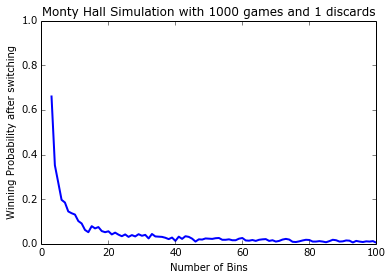

In [6]:
simulation_2dplot(1000, 101, 1, switch=True)

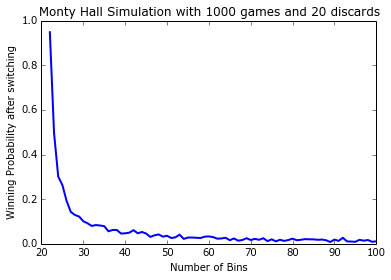

In [7]:
simulation_2dplot(1000, 101, 20, switch=True)

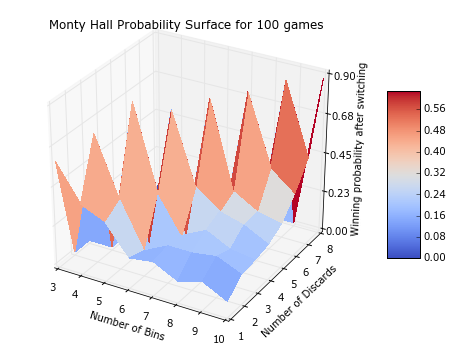

In [8]:
simulation_3dplot(100, 11, 9, switch=True)